# Read a DEAP Logbook 

Read an optimization process logbook, assuming that the [DEAP framework](https://github.com/DEAP/deap) was used.

The code generates a Pandas dataframe with the logbook results, and exports the dataframe to *.csv*. It also uses the dataframe to plot graphics with the relationship between circuit variables, etc. (there are endless opportunities here :p)

The last version of this document is available [here](https://github.com/mdmfernandes/smoc-extras).

## Author

* **Miguel Fernandes** - [mdmfernandes @ GitHub](https://github.com/mdmfernandes)

<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Print-the-logbook-structure" data-toc-modified-id="Print-the-logbook-structure-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Print the logbook structure</a></span></li><li><span><a href="#Get-the-circuit-design-variables" data-toc-modified-id="Get-the-circuit-design-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the circuit design variables</a></span></li><li><span><a href="#Define-the-dataframe-header-and-content" data-toc-modified-id="Define-the-dataframe-header-and-content-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Define the dataframe header and content</a></span></li><li><span><a href="#Get-the-circuit-design-variables-from-the-logbook-population" data-toc-modified-id="Get-the-circuit-design-variables-from-the-logbook-population-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get the circuit design variables from the logbook population</a></span></li><li><span><a href="#Get-the-simulation-results-from-the-logbook" data-toc-modified-id="Get-the-simulation-results-from-the-logbook-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get the simulation results from the logbook</a></span></li></ul></div>

In [1]:
# Imports
%matplotlib inline
import array
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from deap import algorithms, base, creator, tools

In [2]:
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, 1.0))
# Define an individual
creator.create("Individual", array.array, typecode='d', fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

# random generated float
toolbox.register("attr_float", random.uniform, 0, 1)
# Define an individual as a list of floats (iterate over "att_float"
# and place the result in "creator.Individual")
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
# Define the population as a list of individuals (the # of individuals
# is only defined when the population is initialized)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


fname = "../files/lb_20190212_10-55.pickle"

with open(fname, 'rb') as f:
        logbook = pickle.load(f)

## Print the logbook structure

In [3]:
from pprint import pprint

#pprint(vars(logbook))


## Get the circuit design variables

In [4]:
circuit_vars = {
    'inv_vth': [0.3, 0.8],
    'filt_cap': [100e-15, 50e-12],
    'filt_len': [0.2, 0.56], 
    'filt_len_b': [0.2, 0.56], 
    'filt_len_casn': [1, 40], 
    'filt_len_casp': [1, 40], 
    'filt_res_casn': [5e3, 30e3], 
    'filt_res_casp': [5e3, 30e3], 
    #'filt_res_vbp': [1e3, 10e3],
    'filt_wn_bl': [1, 35],
    'filt_wn_br': [1, 100],
    'filt_wn_casn': [1, 50],
    'filt_wn_tl': [1, 50],
    'filt_wn_tr': [1, 150],
    'filt_wp_bl': [1, 5],
    'filt_wp_br': [1, 150],
    'filt_wp_casp': [1, 50],
    'filt_wp_tl': [1, 50], 
    'filt_wp_tr': [1, 150], 
    'filt_wp_vbp': [1, 35],
    'idac': [0.1e-6, 25e-6],
    'idac2': [0.1e-6, 50e-6],
    'Cosc': [1e-15, 250e-15],
    'osc_len_bias': [1, 20],
    'osc_len_btm': [0.2, 0.56],
    'osc_len_top': [0.2, 0.56],
    'osc_wn': [1, 20],
    'osc_wn_bb': [1, 50],
    'osc_wn_bias': [1, 20],
    'osc_wn_bt': [1, 50],
    'osc_wp': [1, 50],
    'Rbias': [1e3, 25e3],
    'Rosc': [1e3, 50e3]
}
    
circuit_vars_keys = list(circuit_vars.keys())
print("VARIABLES_KEYS:", circuit_vars_keys)

VARIABLES_KEYS: ['inv_vth', 'filt_cap', 'filt_len', 'filt_len_b', 'filt_len_casn', 'filt_len_casp', 'filt_res_casn', 'filt_res_casp', 'filt_wn_bl', 'filt_wn_br', 'filt_wn_casn', 'filt_wn_tl', 'filt_wn_tr', 'filt_wp_bl', 'filt_wp_br', 'filt_wp_casp', 'filt_wp_tl', 'filt_wp_tr', 'filt_wp_vbp', 'idac', 'idac2', 'Cosc', 'osc_len_bias', 'osc_len_btm', 'osc_len_top', 'osc_wn', 'osc_wn_bb', 'osc_wn_bias', 'osc_wn_bt', 'osc_wp', 'Rbias', 'Rosc']


## Define the dataframe header and content

In [5]:
df_header = ['inv_vth', 'filt_cap', 'filt_len', 'filt_len_b', 'filt_len_casn', 'filt_len_casp', 'filt_res_casn', 'filt_res_casp', 'filt_res_vbp', 'filt_wn_bl', 'filt_wn_br', 'filt_wn_casn', 'filt_wn_tl', 'filt_wn_tr', 'filt_wp_bl', 'filt_wp_br', 'filt_wp_casp', 'filt_wp_tl', 'filt_wp_tr', 'idac', 'idac2', 'Cosc', 'osc_len_bias', 'osc_len_btm', 'osc_len_top', 'osc_wn', 'osc_wn_bb', 'osc_wn_bias', 'osc_wn_bt', 'osc_wp', 'Rbias', 'Rosc', 'SINAD']
# 'df_data' is an empty list dictionary with 'df_header' keys
df_data = dict.fromkeys(df_header, [])

df_data

{'inv_vth': [],
 'filt_cap': [],
 'filt_len': [],
 'filt_len_b': [],
 'filt_len_casn': [],
 'filt_len_casp': [],
 'filt_res_casn': [],
 'filt_res_casp': [],
 'filt_res_vbp': [],
 'filt_wn_bl': [],
 'filt_wn_br': [],
 'filt_wn_casn': [],
 'filt_wn_tl': [],
 'filt_wn_tr': [],
 'filt_wp_bl': [],
 'filt_wp_br': [],
 'filt_wp_casp': [],
 'filt_wp_tl': [],
 'filt_wp_tr': [],
 'idac': [],
 'idac2': [],
 'Cosc': [],
 'osc_len_bias': [],
 'osc_len_btm': [],
 'osc_len_top': [],
 'osc_wn': [],
 'osc_wn_bb': [],
 'osc_wn_bias': [],
 'osc_wn_bt': [],
 'osc_wp': [],
 'Rbias': [],
 'Rosc': [],
 'SINAD': []}

## Get the circuit design variables from the logbook population

In [6]:
population = logbook.chapters['population'].select('value')

pop = []

for idx, ind in enumerate(population):
    pop.extend(ind)


for idx, key in enumerate(circuit_vars_keys):
    if key in df_header: # only want the ones to put in the dataframe
        df_data[key] = [ind[idx] for ind in list(pop)] 
        


## Get the simulation results from the logbook

In [7]:
results = logbook.chapters['result'].select('value')
res = []

for r in results:
    res.extend(r)


for ind in res:
    print(ind)
    for key, val in ind.items():
        if key in df_header:
            df_data[key].extend([val])
            
df_data['SINAD']

{'SINAD': 1.67641, 'POWER': 0.00157875}
{'SINAD': -1.48675, 'POWER': 0.000609973}
{'SINAD': 1.4602, 'POWER': 0.000814835}
{'SINAD': -1.37305, 'POWER': 0.000686079}
{'SINAD': -1.48675, 'POWER': 0.000612406}
{'SINAD': 0.0319403, 'POWER': 0.00105254}
{'SINAD': 1.42596, 'POWER': 0.00249822}
{'SINAD': -1.48675, 'POWER': 0.000619573}
{'SINAD': 0.0319403, 'POWER': 0.00190225}
{'SINAD': -0.15555, 'POWER': 0.00161554}
{'SINAD': -0.914444, 'POWER': 0.00127923}
{'SINAD': -1.48675, 'POWER': 0.000627976}
{'SINAD': 0.0319403, 'POWER': 0.00192458}
{'SINAD': -1.48675, 'POWER': 0.000665435}
{'SINAD': -0.39228, 'POWER': 0.00235722}
{'SINAD': 0.0319403, 'POWER': 0.00251707}
{'SINAD': -1.48675, 'POWER': 0.000685975}
{'SINAD': 0.0319403, 'POWER': 0.00342967}
{'SINAD': -1.48675, 'POWER': 0.000692501}
{'SINAD': 0.0319403, 'POWER': 0.00414436}
{'SINAD': -1.48675, 'POWER': 0.000701567}
{'SINAD': -1.48675, 'POWER': 0.000729329}
{'SINAD': -1.48675, 'POWER': 0.000741779}
{'SINAD': -1.48675, 'POWER': 0.000806709}


{'SINAD': 21.1906, 'POWER': 0.000593655}
{'SINAD': 21.1906, 'POWER': 0.000593655}
{'SINAD': 21.1906, 'POWER': 0.000593655}
{'SINAD': 20.3704, 'POWER': 0.000581296}
{'SINAD': 43.5314, 'POWER': 0.00124871}
{'SINAD': 43.5314, 'POWER': 0.00124871}
{'SINAD': 42.2117, 'POWER': 0.00120648}
{'SINAD': 42.2117, 'POWER': 0.00120648}
{'SINAD': 39.8041, 'POWER': 0.00109879}
{'SINAD': 28.7301, 'POWER': 0.000664459}
{'SINAD': 29.0292, 'POWER': 0.000672437}
{'SINAD': 28.8794, 'POWER': 0.000668693}
{'SINAD': 31.5182, 'POWER': 0.000707482}
{'SINAD': 34.3094, 'POWER': 0.000765248}
{'SINAD': 32.6616, 'POWER': 0.00073365}
{'SINAD': 43.4425, 'POWER': 0.00139711}
{'SINAD': 40.6726, 'POWER': 0.00119618}
{'SINAD': 40.6726, 'POWER': 0.00119618}
{'SINAD': 41.8803, 'POWER': 0.00124874}
{'SINAD': 40.7173, 'POWER': 0.00121036}
{'SINAD': 39.5454, 'POWER': 0.00115791}
{'SINAD': 35.6298, 'POWER': 0.00105184}
{'SINAD': 39.0513, 'POWER': 0.00112877}
{'SINAD': 39.2769, 'POWER': 0.00115152}
{'SINAD': 39.2769, 'POWER': 0.0

[1.67641,
 -1.48675,
 1.4602,
 -1.37305,
 -1.48675,
 0.0319403,
 1.42596,
 -1.48675,
 0.0319403,
 -0.15555,
 -0.914444,
 -1.48675,
 0.0319403,
 -1.48675,
 -0.39228,
 0.0319403,
 -1.48675,
 0.0319403,
 -1.48675,
 0.0319403,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -9.12702,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -2.40794,
 -1.48675,
 -7.9571,
 -1.48675,
 -1.5731,
 -1.48675,
 -3.63581,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.5731,
 -1.48675,
 -1.91197,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -3.70885,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,
 -1.48675,

In [8]:
pd.options.display.float_format = '{:.4g}'.format

dataset = pd.DataFrame(df_data)

dataset.to_csv('population.csv', sep='\t')

dataset

,inv_vth,filt_cap,filt_len,filt_len_b,filt_len_casn,filt_len_casp,filt_res_casn,filt_res_casp,filt_res_vbp,filt_wn_bl,...,osc_len_btm,osc_len_top,osc_wn,osc_wn_bb,osc_wn_bias,osc_wn_bt,osc_wp,Rbias,Rosc,SINAD
0,0.6285,1.147e-11,0.4203,0.5146,21.31,19.32,7643,3696,1.676,4.058,...,0.2175,0.5211,5.838,7.286,11.46,2.76,5.101,2.113e+04,4.579e+04,1.676
1,0.6613,8.795e-12,0.3551,0.3987,4.748,8.464,1.672e+04,2795,-1.487,32.21,...,0.2438,0.4006,19.5,23.3,10.8,42.98,17.21,6600,3.911e+04,-1.487
2,0.7354,2.299e-11,0.2155,0.3813,38.36,35.28,2.312e+04,1084,1.46,27.95,...,0.4031,0.4394,17.21,44.58,17.85,30.2,25.37,2.5e+04,1.16e+04,1.46
3,0.7977,1.723e-11,0.5163,0.2855,8.42,2.913,1.656e+04,7855,-1.373,17.74,...,0.486,0.4082,6.652,30.57,2.679,33.87,2.44,1120,3.805e+04,-1.373
4,0.5623,8.994e-12,0.4023,0.2823,4.949,26.71,2.233e+04,4754,-1.487,17.63,...,0.5132,0.2437,5.514,41.24,5.158,45.03,43.03,4405,4.117e+04,-1.487
5,0.7867,2.637e-11,0.3996,0.4883,28.9,19.24,2.278e+04,5614,0.03194,14.7,...,0.3522,0.5266,6.185,40.86,11.36,1.954,1.102,1.037e+04,4.823e+04,0.03194
6,0.7472,2.584e-11,0.3416,0.3742,9.912,1.328,2.175e+04,5044,1.426,5.177,...,0.2949,0.3308,17.66,45.02,10.84,25.37,47.99,2.32e+04,1.558e+04,1.426
7,0.7933,4.649e-11,0.4178,0.3938,20.01,15.3,1.904e+04,7789,-1.487,27.95,...,0.5349,0.2473,3.163,5.97,4.884,43.58,12.98,1.047e+04,2.414e+04,-1.487
8,0.7538,2.065e-11,0.2581,0.5141,19.18,37.89,2.4e+04,2941,0.03194,26.39,...,0.5348,0.306,14.23,14.04,12.7,27.06,45.71,1.544e+04,2.267e+04,0.03194
9,0.6278,4.793e-11,0.2947,0.3824,33.34,16.16,1.428e+04,2383,-0.1555,5.267,...,0.4837,0.3584,7.618,21.35,8.019,14.12,2.486,1.046e+04,1961,-0.1555


In [9]:
dataset.describe()

,inv_vth,filt_cap,filt_len,filt_len_b,filt_len_casn,filt_len_casp,filt_res_casn,filt_res_casp,filt_res_vbp,filt_wn_bl,...,osc_len_btm,osc_len_top,osc_wn,osc_wn_bb,osc_wn_bias,osc_wn_bt,osc_wp,Rbias,Rosc,SINAD
count,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
mean,0.7157,3.185e-11,0.3738,0.3922,21.63,20.57,1.978e+04,5126,14.59,21.28,...,0.4284,0.4053,10.8,21.5,8.706,21.72,15.16,1.275e+04,2.669e+04,14.59
std,0.1069,1.469e-11,0.09207,0.104,9.314,11,4893,2188,17.74,7.314,...,0.08767,0.09632,6.282,15.16,4.135,13.94,13.99,6453,1.71e+04,17.74
min,0.3034,6.898e-13,0.2061,0.2059,1.036,1.144,5069,1000,-9.127,1.025,...,0.2038,0.2079,1.027,1.144,1.066,1.003,1.011,1001,1607,-9.127
25%,0.691,1.723e-11,0.2822,0.2817,11.54,16.03,1.657e+04,3195,-1.015,17.74,...,0.3517,0.306,5.838,5.205,5.318,9.403,2.44,1.037e+04,7991,-1.015
50%,0.7478,3.203e-11,0.3939,0.3938,25.22,18.8,2.227e+04,5403,2.152,23.4,...,0.4828,0.422,9.294,22.94,8.942,20.24,8.399,1.486e+04,3.37e+04,2.152
75%,0.7893,4.728e-11,0.4275,0.4882,28.9,28.79,2.278e+04,7029,31.54,23.93,...,0.4837,0.5004,19.17,33.18,11.36,33.7,26.62,1.659e+04,4.117e+04,31.54
max,0.7996,5e-11,0.5564,0.56,39.82,39.95,2.991e+04,9987,80.51,34.95,...,0.5573,0.5528,20,49.9,19.85,49.9,49.87,2.5e+04,4.991e+04,80.51


In [10]:
dataset.sort_values(by=['SINAD'], ascending=False)

,inv_vth,filt_cap,filt_len,filt_len_b,filt_len_casn,filt_len_casp,filt_res_casn,filt_res_casp,filt_res_vbp,filt_wn_bl,...,osc_len_btm,osc_len_top,osc_wn,osc_wn_bb,osc_wn_bias,osc_wn_bt,osc_wp,Rbias,Rosc,SINAD
2401,0.7334,3.71e-11,0.4083,0.481,10.86,37.93,2.235e+04,3127,80.51,23.14,...,0.4849,0.4662,5.242,5.055,10.51,13.73,4.277,1.067e+04,4705,80.51
2301,0.7334,3.71e-11,0.4083,0.481,10.86,37.93,2.235e+04,3127,80.51,23.14,...,0.4849,0.4662,5.242,5.055,10.51,13.73,4.277,1.067e+04,4705,80.51
2201,0.7334,3.71e-11,0.4083,0.481,10.86,37.93,2.235e+04,3127,80.51,23.14,...,0.4849,0.4662,5.242,5.055,10.51,13.73,4.277,1.067e+04,4705,80.51
2403,0.6217,3.69e-11,0.4032,0.4767,10.85,13.82,2.392e+04,7351,77.6,34.61,...,0.5292,0.5314,5.624,9.326,8.33,21.67,6.137,6224,1.314e+04,77.6
2302,0.6217,3.69e-11,0.4032,0.4767,10.85,13.82,2.392e+04,7351,77.6,34.61,...,0.5292,0.5314,5.624,9.326,8.33,21.67,6.137,6224,1.314e+04,77.6
2202,0.6217,3.69e-11,0.4032,0.4767,10.85,13.82,2.392e+04,7351,77.6,34.61,...,0.5292,0.5314,5.624,9.326,8.33,21.67,6.137,6224,1.314e+04,77.6
2300,0.7867,2.637e-11,0.3996,0.4907,29.52,19.24,2.278e+04,5752,75.04,23.54,...,0.4064,0.4431,6.17,39.96,11.36,30.55,1.173,1.037e+04,4.823e+04,75.04
2200,0.7867,2.637e-11,0.3996,0.4907,29.52,19.24,2.278e+04,5752,75.04,23.54,...,0.4064,0.4431,6.17,39.96,11.36,30.55,1.173,1.037e+04,4.823e+04,75.04
2400,0.7867,2.637e-11,0.3996,0.4907,29.52,19.24,2.278e+04,5752,75.04,23.54,...,0.4064,0.4431,6.17,39.96,11.36,30.55,1.173,1.037e+04,4.823e+04,75.04
2402,0.7892,2.637e-11,0.3632,0.4922,20.14,18.83,1.589e+04,5403,71.61,23.54,...,0.4064,0.422,6.17,30.98,11.32,32.85,1.173,1.037e+04,4.887e+04,71.61


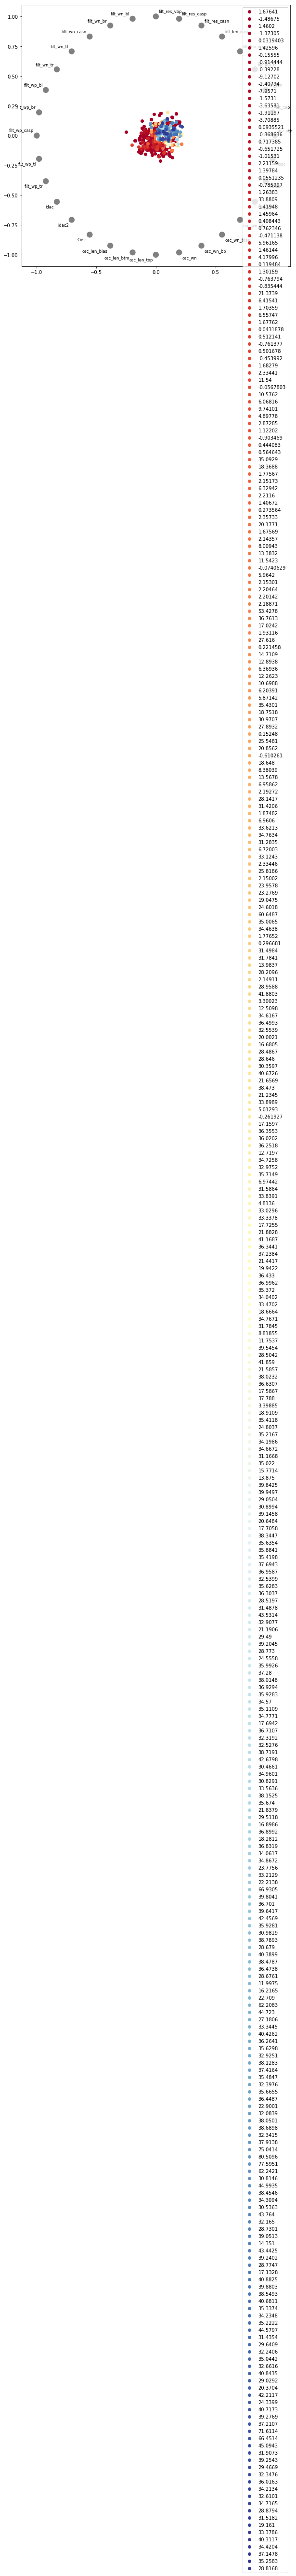

In [11]:
from pandas.plotting import radviz
plt.figure(figsize=(10,10))
radviz(dataset, 'SINAD', colormap="RdYlBu")

(0, 0.0001)

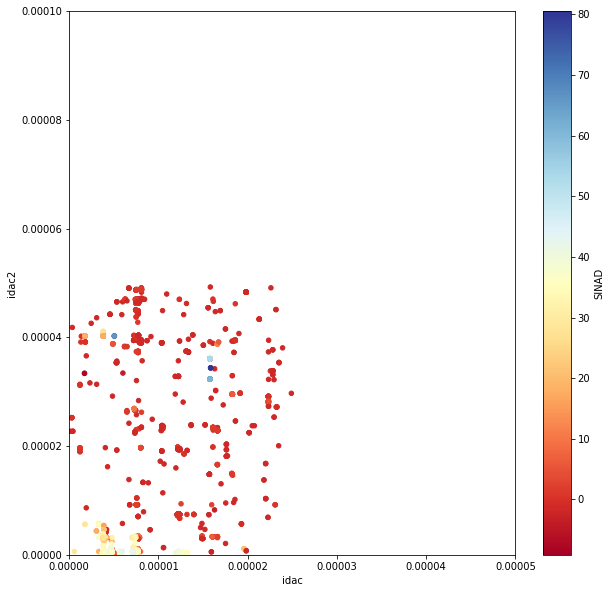

In [12]:
ax = dataset.plot.scatter(x="idac", y="idac2", c='SINAD', cmap='RdYlBu', figsize=(10,10), sharex=False)
ax.set_xlim(0, 50e-6)
ax.set_ylim(0, 100e-6)

(0, 5e-05)

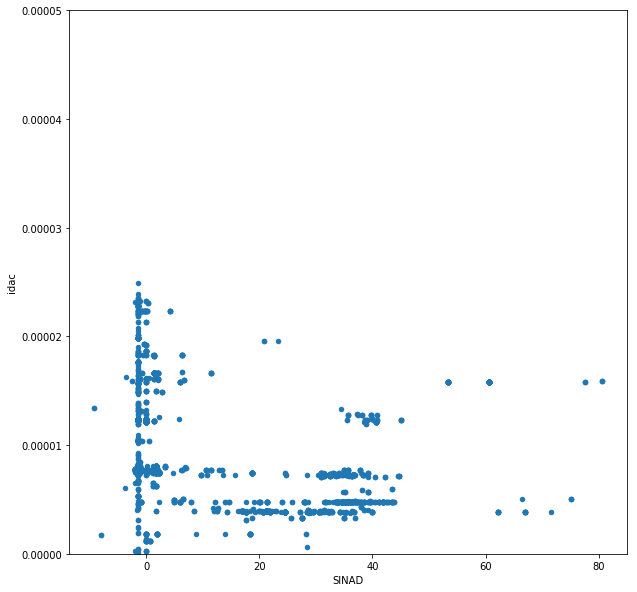

In [13]:
ax = dataset.plot.scatter(x="SINAD", y="idac", figsize=(10,10))
ax.set_ylim(0, 50e-6)